<a href="https://colab.research.google.com/github/Tauseef-09/Airbnb_EDA_project/blob/main/Airbnb_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

---

##Importing necessary Modules.



In [31]:
# importing necessary libraries for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Mounting to drive


In [32]:
# Mounting drive inorder to get the data set

from google.colab import drive
drive.mount('/content/mount')


Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


##Reading the necessary file from the drive


In [33]:
# Reading the required data set from drive and storing it in a variable

working_path = '/content/mount/MyDrive/mount_data'
df = pd.read_csv(working_path + '/Airbnb NYC 2019.csv') # Here df is of type Data Frame 


# **Data Observation and Data Cleaning**

---


In [34]:
# Finding how many records and fields are there in our data set

df.shape


(48895, 16)

In [35]:
# Inspecting the top 5 records in our data set

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [36]:
# Inspecting the last 5 records in our data set

df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [37]:
# Inspecting whole data set to get information 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [38]:
# Dropping the unnecessary columns from our data set 

df.drop(['neighbourhood', 'latitude', 'longitude', 'reviews_per_month'], axis = 1 , inplace = True)


In [39]:
# Inspecting about the number of null values present in each column

df.isna().sum()
 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [40]:
# Replacing null values in 'last_review' (if we drop the records of null values in 'last_review' we will loose lot of data)
# Dropping the records with null values in 'host_name' and 'last_review' column.

df.fillna({'last_review': '00-00-0000'}, inplace = True)
df = df.dropna(subset=['host_name', 'name', 'last_review'])


In [41]:
# Inspecting about the number of null values present in our whole data set

df.isna().sum().sum()
 

0

In [42]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


Here we can observe that the minimum price of hostling is 0 which can't be possible. so, we have to replace the value of min price with some low value.

In [43]:
def corrected_price(price):
  if price == 0:
    return 10
  else:
    return price

df['price'] = df['price'].apply(corrected_price)

In [44]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.742560,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.231001,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


We have replaced the hostlings which has price value '0' with the minimum value (10). 

# **Exploratory Data Analysis**

---

#### 1 - As reviews are very important for any organization. It shows how satisfied a customer is about the services provided by the organization. it is very important to have some insights about reviews.

#### Analyzing the data to find the relation between the reviews given by the customers acrosss different periods of all months and all years.

In [45]:
# Taking the month and the day from the date column 'last_review' and converting it into integer.

df['last_review_month'] = df['last_review'].apply(lambda x: x[3:5]).astype(int)
df['last_review_day'] = df['last_review'].apply(lambda x: x[:2]).astype(int)


In [46]:
df['last_review_month'].nunique()

13

In [47]:
# Dropping the records which has the 'last_review_month' as 0.
# This step also drops the column 'last_review_day' in which the values are 0.

df.drop(df[df['last_review_month'] == 0 ].index, inplace = True)


In [48]:
df['last_review_month'].nunique()

# Now we have exact 12 months to analyze our data.

12

In [49]:
# I am categorizing the dates of months into three phases to get the insights in which phase people are more likely to give a review

def catrgeorizing(date):
    
    if 1 <= date < 11:
        return '1st phase'
    elif 11 <= date < 21:
        return '2nd phase'
    else:
        return '3rd phase'
    
df['last_review_day'] = df['last_review_day'].apply(lambda x: catrgeorizing(x))


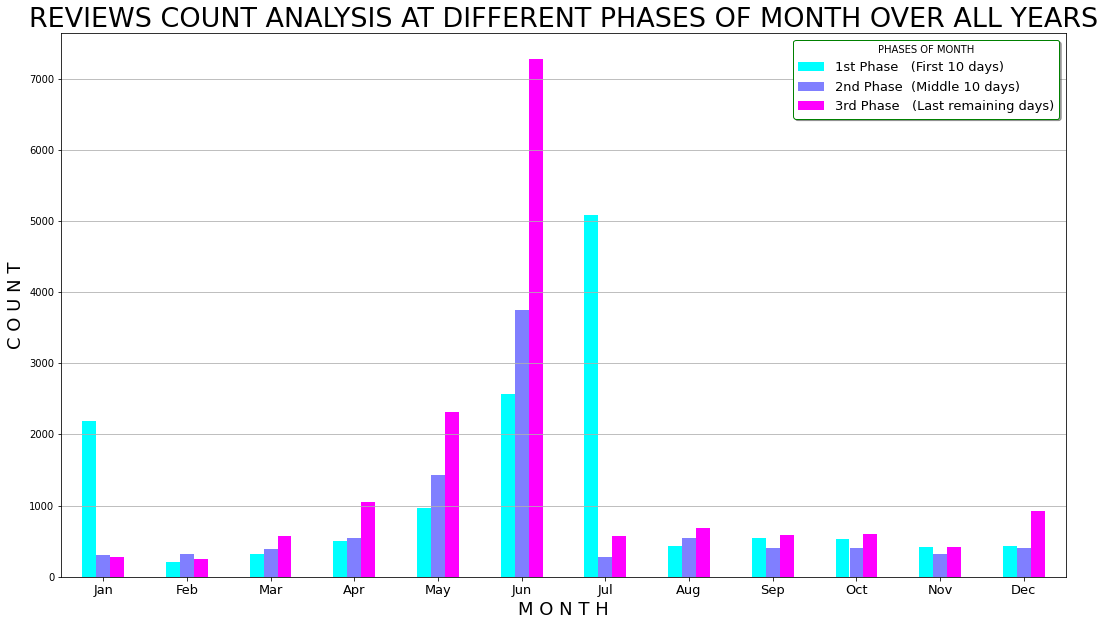

In [53]:
# Plotting a bar graph to get the insights.


df.groupby('last_review_day').last_review_month.value_counts().unstack(0).plot.bar(figsize = (18, 10), cmap = 'cool')
plt.title('REVIEWS COUNT ANALYSIS AT DIFFERENT PHASES OF MONTH OVER ALL YEARS', fontsize = 27)
plt.xlabel('M O N T H', fontsize = 18)
plt.ylabel('C O U N T', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 360, fontsize = 13)
plt.grid(axis = 'y')
plt.legend(['1st Phase   (First 10 days)', '2nd Phase  (Middle 10 days)','3rd Phase   (Last remaining days)'], shadow = True, edgecolor = 'green', title = 'PHASES OF MONTH', fontsize = 13)
plt.show()



### INFERENCE:
We can see that the reviews count is more in May, June and starting days of July and also in end of Dec and starting days of Jan [ It may be because these are holiday periods like may,jun and starting of july is a part of summer and last days of dec and first few days of Jan is part of christmas and new year celebrations]

1 - Normal days when people visit hostling they might be visiting become of some work and business need so they are less likely to have intrest in spending time to give a review but on other hand during holidays we have more chances of people showing intrest in giving reviews

2 - Out of 12 months 9 months have slightly more reviews in the last phases of the month [ it might be because the people will be busy during the initial fortnight of month with work ]

From these insights we can draw conclusions like we should focus on asking frquently more reviews during holidays and also not to disturb more during the normal days so that they won't get annoyed.
